In [141]:
from frozen_yoghourt import *

In [24]:
circ = q(3)
circ.x(0)
circ.ccx(2, 1, 0)

get(circ)

Matrix([
[  0, 1.0,   0,   0,   0,   0,   0,   0],
[1.0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0, 1.0,   0,   0,   0,   0],
[  0,   0, 1.0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0, 1.0,   0,   0],
[  0,   0,   0,   0, 1.0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0, 1.0,   0],
[  0,   0,   0,   0,   0,   0,   0, 1.0]])

In [20]:
def truth_table(unitary):
    
    truth_dict = {}
    size = unitary.shape[0]

    length = int(np.log2(size))

    binary_list = list(product(*[('0','1')]*length))

    for i in range(size):
        
        truth_dict[''.join(binary_list[i])] = bin(np.int(np.where(unitary[:, i])[0]))[2:].zfill(length)
        
        print(f"  {str(i).zfill(2)}   {''.join(binary_list[i])} ---> {truth_dict[''.join(binary_list[i])]}   {str(np.int(np.where(unitary[:, i])[0])).zfill(2)}")
        
    return truth_dict

In [14]:
circ = q(5)

circ.x(1)
circ.x(3)
control_qubits=[0, 1, 2, 3]

circ.mct(control_qubits,4)
circ.x(1)
circ.x(3)
circ.x(2)
circ.x(0)
circ.mct(control_qubits,4)
circ.x(1)
circ.x(3)
circ.x(2)
circ.x(0)

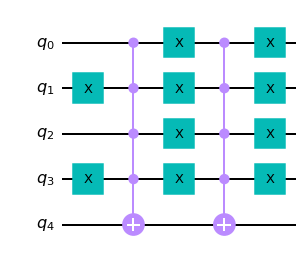

In [16]:
milk(circ)

In [15]:
get(circ)

Matrix([
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1.0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0

In [18]:
a = get(circ, nice = False)

In [19]:
truth_table(a)

TypeError: only size-1 arrays can be converted to Python scalars

cx: 10
u3: 17
Total cost: 117


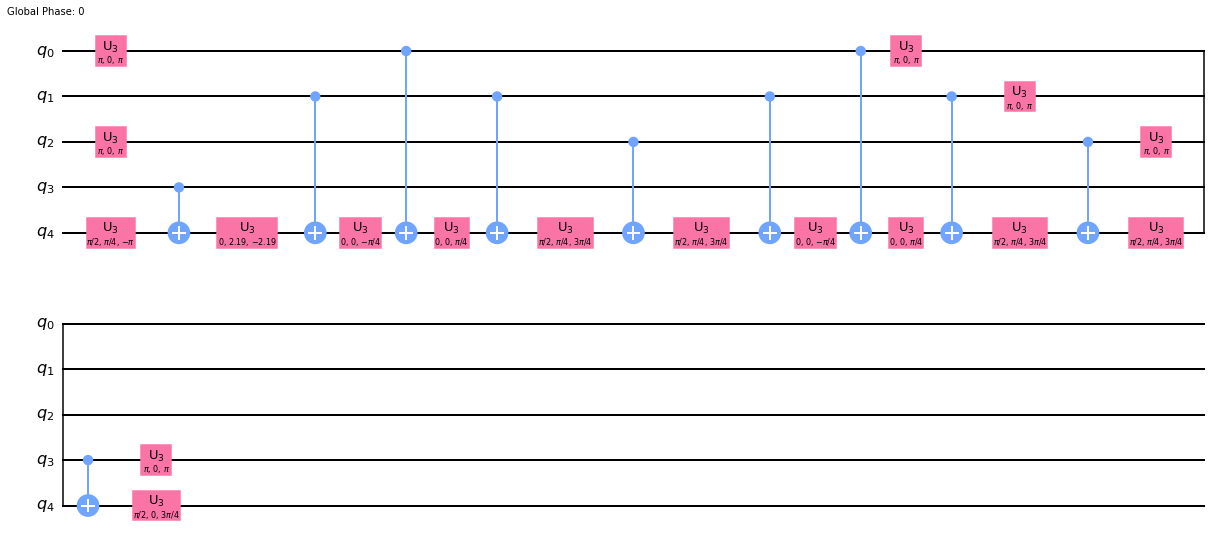

In [3]:
dtp(circ)

In [284]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import math
%matplotlib inline
    
def live_plot(x, y1, len_x):
    clear_output(wait=True)
    
    ### y1
    if 7 <= len(x) <= 15:
        x_axis_len = len(x)
    elif len(x) < 7:
        x_axis_len = 7
    else:
        x_axis_len = 15
    plt.figure(figsize=(x_axis_len,5))
    
    xint = range(min(x), math.ceil(max(x))+1)
    plt.xticks(xint)
    plt.yscale('log')
    
    x = [float(i) for i in x]
    y1 = [float(i) for i in y1]
    
    plt.plot(x, y1, '-o', label='Optimization process', color='k') 

    plt.title('General Cost Over Training')
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.ylabel('General cost')
    plt.show()

In [285]:
## Total Difference function (Cost2)
def cx_diff(y_hat, n):
    qc = q(n+1)
    qc.mct(list(range(n)), n)
    y = get(qc, nice = False)
    
    diff = np.sum(np.abs(np.abs(y_hat) - np.round(y)))
    
    return diff

def get_num_phases(circ, n):
    a = get(circ, nice = False)

    b = np.round(a - np.abs(a))
    
    no_phase = 2**(n+1) - np.sum(np.linalg.norm(b, axis = 0) == 0)

    print(f"Number of phase difference: {no_phase}")
    print(f"Percentage of phase difference: {no_phase/2**(n+1) * 100 }%")

In [286]:
def cx_check(n, circ):
    
    ind_list = np.flip(np.arange(n))
    binary_list = list(product([False,True], repeat = n))

    for i, t_val in enumerate(binary_list):

        x_val = ind_list[list(t_val)]

        qc = q(n+1)

        if len(x_val) > 0:

            ## Add binary input
            qc.x(list(x_val))

            ## Compose the desired circuit
            qc = qc.compose(circ, range(n+1))

            backend = BasicAer.get_backend('statevector_simulator')
            out = execute(qc, backend).result().get_statevector()

            loc = np.where(np.abs(out) >.9)[0][0]

            if i - loc > 0:
                print(f"There is an error at the {i}th column")

        else:
            backend = BasicAer.get_backend('statevector_simulator')
            out = execute(circ, backend).result().get_statevector()

            loc = np.where(np.abs(out) >.9)[0][0]

            if i - loc > 0:
                print(f"There is an error at the {i}th column")

    print('Everything is good!')

In [229]:
f =  lambda a, p, x: a*x**(p)

f =  lambda x:x**1.63

In [230]:
f_test = [f(n) for n in range(1, 400)]

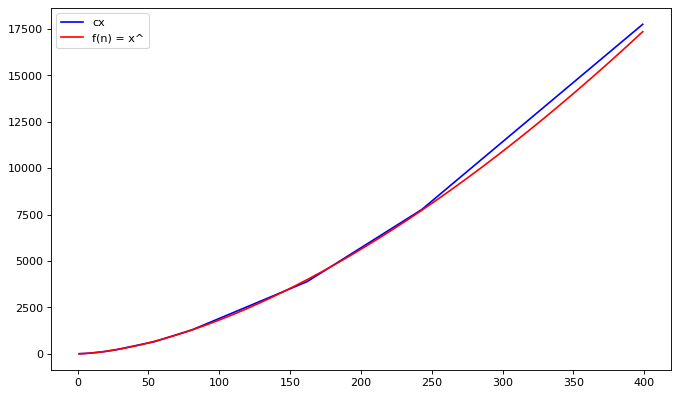

In [231]:
plt.figure(figsize=(10,  6), dpi=80)

plt.plot(range(1, 400), cx_list, 'b', label = 'cx') # Blue

plt.plot(range(1, 400), f_test, 'r', label = f'f(n) = x^') # Red

plt.legend()

In [116]:
for n in range(11, 14):
    
    print(f'{n=}')
    
    ## Create circuit
    circ1 = CnX(n)
    circ2 = CnX(n).inverse()
    
    ## Get cost
    dtp(circ1, nice = False)
    dtp(circ2, nice = False)
    
    ## Get matrix
    mat1 = get(circ1, nice = False)
    mat2 = get(circ2, nice = False)
    
    ## Check Identity
    aae(mat1@mat2, np.identity(2**(n+1)))
    
    print('\n')

n=11
cx: 52
u3: 53
Total cost: 573
cx: 52
u3: 53
Total cost: 573


n=12
cx: 60
u3: 61
Total cost: 661
cx: 60
u3: 61
Total cost: 661


n=13
cx: 68
u3: 69
Total cost: 749
cx: 68
u3: 69
Total cost: 749


KeyboardInterrupt: 

In [117]:
get(CnX(3))

Matrix([
[1.0,   0,   0,     0,   0,   0,   0,    0,   0,   0,   0,      0,   0,   0,   0,   0],
[  0, 1.0,   0,     0,   0,   0,   0,    0,   0,   0,   0,      0,   0,   0,   0,   0],
[  0,   0, 1.0,     0,   0,   0,   0,    0,   0,   0,   0,      0,   0,   0,   0,   0],
[  0,   0,   0, 1.0*I,   0,   0,   0,    0,   0,   0,   0,      0,   0,   0,   0,   0],
[  0,   0,   0,     0, 1.0,   0,   0,    0,   0,   0,   0,      0,   0,   0,   0,   0],
[  0,   0,   0,     0,   0, 1.0,   0,    0,   0,   0,   0,      0,   0,   0,   0,   0],
[  0,   0,   0,     0,   0,   0, 1.0,    0,   0,   0,   0,      0,   0,   0,   0,   0],
[  0,   0,   0,     0,   0,   0,   0,    0,   0,   0,   0,      0,   0,   0,   0, 1.0],
[  0,   0,   0,     0,   0,   0,   0,    0, 1.0,   0,   0,      0,   0,   0,   0,   0],
[  0,   0,   0,     0,   0,   0,   0,    0,   0, 1.0,   0,      0,   0,   0,   0,   0],
[  0,   0,   0,     0,   0,   0,   0,    0,   0,   0, 1.0,      0,   0,   0,   0,   0],
[  0,   0,   0,     0, 

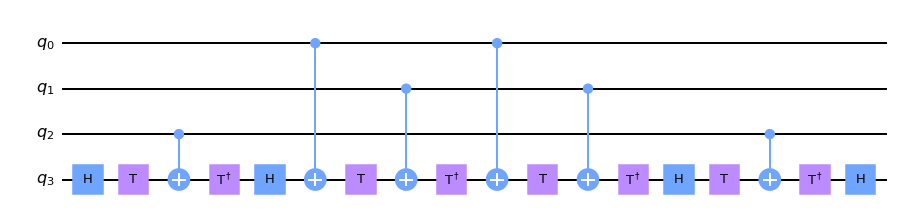

In [118]:
milk(CnX(3))

In [129]:
circ= q(5)
circ.rcccx(0, 1, 2, 3)
circ.cx(3, 4)
circ = circ.rcccx(0, 1, 2, 3).inverse()

In [130]:
milk(circ)

AttributeError: 'InstructionSet' object has no attribute 'draw'

In [131]:
get(circ)

AttributeError: 'InstructionSet' object has no attribute 'name'

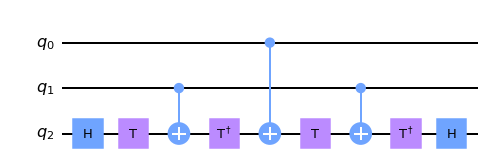

In [133]:
milk(CnX(2))

In [134]:
a = [329,264,268,900,940,1054,514,910,269,481,291,291,372,940,304,674,381,1356,774]

In [135]:
sorted(a)

[264,
 268,
 269,
 291,
 291,
 304,
 329,
 372,
 381,
 481,
 514,
 674,
 774,
 900,
 910,
 940,
 940,
 1054,
 1356]

In [136]:
circ = q(2)
circ.x(0)
circ.h(0)
circ.cx(0, 1)

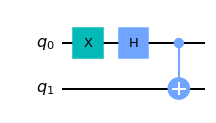

In [137]:
milk(circ)

In [139]:
a = CnX(3).inverse()

In [146]:
get(circ)

Matrix([
[1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0,   0, 1.0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0

In [227]:
A = np.array([[1, 0, 0, 0], 
              [0, -1, 0, 0], 
              [0, 0, 1j, 0], 
              [0, 0, 0, -1j]])

Adag = np.array([[1, 0, 0, 0], 
              [0, -1, 0, 0], 
              [0, 0, -1j, 0], 
              [0, 0, 0, 1j]])

In [228]:
B = np.array([[1, 0, 0, 0], 
              [0, 1, 0, 0], 
              [0, 0, 0, 1], 
              [0, 0, 1, 0]])

In [230]:
view(tensor(Adag, np.identity(2))@ tensor(I, B)@tensor(A, np.identity(2)))

Matrix([
[1.0,   0,   0,   0,   0,   0,   0,   0],
[  0, 1.0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0, 1.0,   0,   0,   0,   0],
[  0,   0, 1.0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0, 1.0,   0,   0,   0],
[  0,   0,   0,   0,   0, 1.0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0, 1.0],
[  0,   0,   0,   0,   0,   0, 1.0,   0]])

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])